# EDA

## Libraries and data import

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
#Lectura de archivos
df_steamgames=pd.read_csv('Datos_procesados/df_steamgames.csv')
df_users=pd.read_csv('Datos_procesados/df_users.csv')
df_user_reviews=pd.read_csv('Datos_procesados/df_user_reviews.csv')

## Steamgames

In [5]:
df_steamgames.columns

Index(['item_id', 'item_title', 'price', 'Action', 'Casual', 'Indie',
       'Simulation', 'Strategy', 'Free to Play', 'RPG', 'Sports', 'Adventure',
       'Racing', 'Early Access', 'Massively Multiplayer',
       'Animation & Modeling', 'Video Production', 'Utilities',
       'Web Publishing', 'Education', 'Software Training',
       'Design & Illustration', 'Audio Production', 'Photo Editing',
       'Accounting', 'release_year', 'playtime_forever', 'mean_recommend',
       'mean_sentiment_analysis', 'total_reviews', 'players'],
      dtype='object')

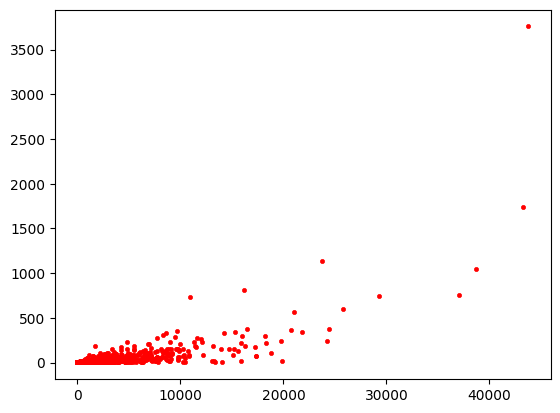

In [24]:
#relacion entre reviews y cantidad de jugadores

plt.scatter( df_steamgames['players'], df_steamgames['total_reviews'], color='red', marker='.', linewidth=0.5)

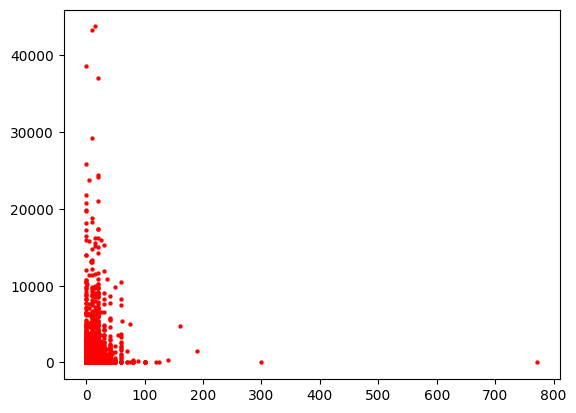

In [23]:
#relacion entre precio y cantidad de jugadores

plt.scatter(df_steamgames['price'], df_steamgames['players'], color='red', marker='.', linewidth=0.1)

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 9.000e+00,
        7.000e+00, 1.000e+01, 1.200e+01, 1.600e+01, 1.500e+01, 3.400e+01,
        3.600e+01, 3.300e+01, 3.900e+01, 4.200e+01, 6.100e+01, 5.500e+01,
        4.000e+01, 6.900e+01, 5.000e+01, 8.400e+01, 7.900e+01, 1.020e+02,
        1.550e+02, 1.670e+02, 2.130e+02, 3.370e+02, 4.360e+02, 5.890e+02,
        1.192e+03, 1.551e+03, 2.832e+03, 4.945e+03, 6.933e+03, 9.517e+03,
        9.600e+01, 3.000e+00, 1.000e+00]),
 array([1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
        1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
        1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
        1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
        2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        20

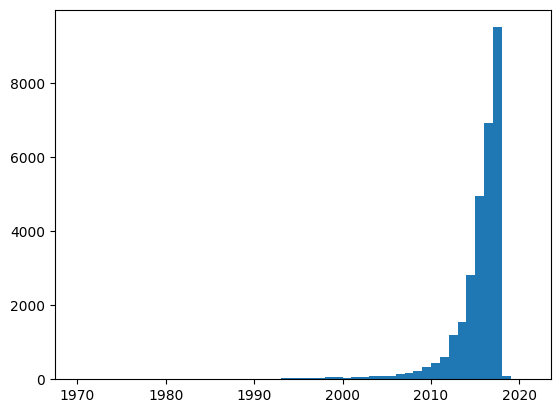

In [40]:
#juegos por año de lanzamiento
bines=max(df_steamgames['release_year'][df_steamgames['release_year']!=0].unique()) - min(df_steamgames['release_year'][df_steamgames['release_year']!=0].unique())
plt.hist(df_steamgames['release_year'][df_steamgames['release_year']!=0], bins=bines)

## Users

In [50]:
df_users[df_users['items']>=1000]

,user_id,items,playtime_forever,playtime_2weeks,total_spent,Action,Casual,Indie,Simulation,Strategy,...,Web Publishing,Education,Software Training,Design & Illustration,Audio Production,Photo Editing,Accounting,mean_recommend,mean_sentiment_analysis,total_reviews
930,76561197960324641,1169,366701.0,2967.0,13285.01,665,196,388,170,366,...,0,12,0,0,0,0,0,NaN,NaN,NaN
1240,76561197967469174,3206,13681.0,118.0,23994.67,1600,858,1890,453,743,...,1,30,3,7,1,0,0,NaN,NaN,NaN
1405,76561197970580235,2070,466040.0,2708.0,19863.50,1118,404,1193,277,591,...,0,20,0,3,0,0,0,1.0,0.000000,1.0
1477,76561197971119511,1596,192846.0,0.0,13160.78,821,324,714,186,431,...,2,8,0,2,1,1,0,1.0,1.000000,3.0
1694,76561197975369524,2586,540997.0,1527.0,26654.33,1368,545,1230,413,825,...,0,27,0,2,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70419,xerector,1198,448075.0,0.0,9069.15,593,290,609,152,241,...,2,18,9,10,1,4,0,NaN,NaN,NaN
70441,xinyo,2162,63335.0,264.0,17315.99,1124,520,1153,294,497,...,4,21,4,10,2,3,0,1.0,1.000000,3.0
70456,xmatiias,1341,342447.0,3758.0,8416.75,663,372,752,184,302,...,1,13,1,2,1,0,0,1.0,1.000000,5.0
70486,xxTankaxx,1041,270465.0,162.0,9329.59,564,243,504,130,275,...,1,11,0,1,0,0,0,NaN,NaN,NaN


(array([6.3244e+04, 5.6400e+03, 1.2210e+03, 3.8000e+02, 1.6400e+02,
        9.2000e+01, 4.3000e+01, 2.4000e+01, 2.5000e+01, 1.2000e+01,
        1.4000e+01, 9.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00,
        2.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 1.56240e+02, 3.11480e+02, 4.66720e+02, 6.21960e+02,
        7.77200e+02, 9.32440e+02, 1.08768e+03, 1.24292e+03, 1.39816e+03,
        1.55340e+03, 1.70864e+03, 1.86388e+03, 2.01912e+03, 2.17436e+03,
        2.32960e+03, 2.48484e+03, 2.64008e+03, 2.79532e+03, 2.95056e+03,
        3.10580e+03, 3.261

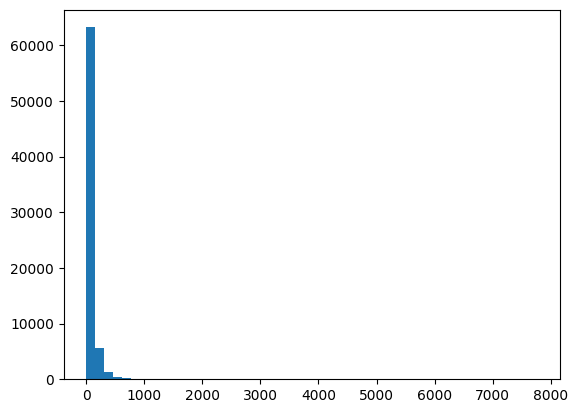

In [47]:
#cantidad de juegos por jugador
df_users['items'].max()
plt.hist(df_users['items'], bins=50)

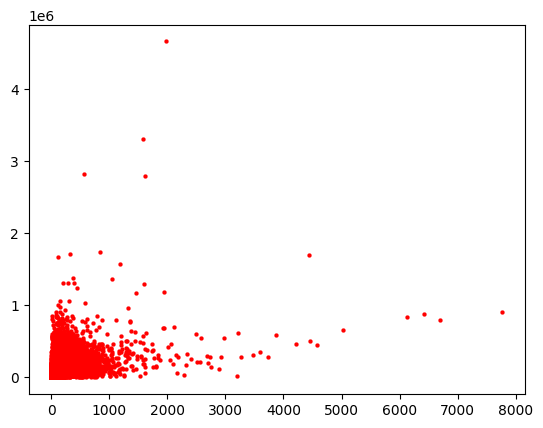

In [42]:
plt.scatter(df_users['items'], df_users['playtime_forever'], color='red', marker='.', linewidth=0.1)

In [44]:
df_users.columns

Index(['user_id', 'items', 'playtime_forever', 'playtime_2weeks',
       'total_spent', 'Action', 'Casual', 'Indie', 'Simulation', 'Strategy',
       'Free to Play', 'RPG', 'Sports', 'Adventure', 'Racing', 'Early Access',
       'Massively Multiplayer', 'Animation & Modeling', 'Video Production',
       'Utilities', 'Web Publishing', 'Education', 'Software Training',
       'Design & Illustration', 'Audio Production', 'Photo Editing',
       'Accounting', 'mean_recommend', 'mean_sentiment_analysis',
       'total_reviews'],
      dtype='object')

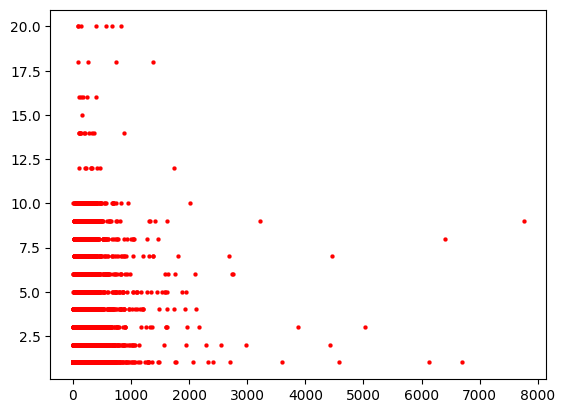

In [45]:
plt.scatter(df_users['items'], df_users['total_reviews'], color='red', marker='.', linewidth=0.1)

## User reviews